# 2 - Layer Neural network

1. Size of layers and initializing parameters weights and bias
2. Forward propagation
3. Loss function and Cost function
4. Backward propagation
5. Update Parameters
6. Prediction with learnt parameters weight and bias
7. Create Model

Inital weights will be small If they are very large initially, this will cause the inputs of the tanh to be very large, thus causing gradients to be close to zero. The optimization algorithm will be slow.

Bias can be zero initially

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data set of images into numpy data
x_l= np.load('Signs_Data/X.npy')
y_l= np.load('Signs_Data/Y.npy')
x_l.shape
y_l.shape
X=np.concatenate((x_l[204:409],x_l[822:1027]),axis=0)
z = np.zeros(205)
o = np.ones(205)
Y=np.concatenate((z,o),axis=0).reshape(X.shape[0],1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test,X_test.shape[1]*X_test.shape[2])

X_train_flatten.shape,X_test_flatten.shape

x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4096, 348), (4096, 62), (1, 348), (1, 62))

In [20]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train,y_train):
    parameters={"weight1":np.random.randn(3,x_train.shape[0])*0.1,
               "bias1":np.zeros((3,1)),
                "weight2":np.random.randn(y_train.shape[0],3)*0.1,
                "bias2":np.zeros((y_train.shape[0],1))
               }
    return parameters

In [23]:
def sigmoid(z):
    y_head= 1/(1+np.exp(-z))
    return y_head

## forward propagation
we use tanh(x)

In [25]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

## Loss function and Cost function

Loss and cost functions are same with logistic regression

Cross entropy function

In [14]:
def compute_cost_NN(a2,Y,parameters):
    logprobs= np.multiply(np.log(a2),Y)
    cost=-np.sum(logprobs)/Y.shape[1]
    return cost

## Backward propagation
 Back propagation is the derivative of the function and it is same as logistic

In [15]:
def backward_propagation_NN(parameters,cache,X,Y):
    dZ2=cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads
    

## updating the parameters

weights-learning_rate*dweights

In [16]:
def update_parameters_NN(parameters,grads,learning_rate=0.01):
    parameters={
            "weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
            "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
            "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
            "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]
        }
    return parameters

## prediction with learnt parameters

In [17]:
def predict_NN(parameters,x_test):
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
            
    return Y_prediction

## Putting all together to form a predictive model

In [18]:
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    
    for i in range(0, num_iterations):
        # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
        # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        # update parameters
        parameters = update_parameters_NN(parameters, grads)
        # printing the cost for every 100 iterations
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # plot of iterations Vs cost
    
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

Cost after iteration 0: 0.303923
Cost after iteration 100: 0.310447
Cost after iteration 200: 0.284531
Cost after iteration 300: 0.241786
Cost after iteration 400: 0.203581
Cost after iteration 500: 0.171970
Cost after iteration 600: 0.146955
Cost after iteration 700: 0.127301
Cost after iteration 800: 0.111777
Cost after iteration 900: 0.099349
Cost after iteration 1000: 0.089176
Cost after iteration 1100: 0.080681
Cost after iteration 1200: 0.073532
Cost after iteration 1300: 0.067511
Cost after iteration 1400: 0.062378
Cost after iteration 1500: 0.057842
Cost after iteration 1600: 0.053602
Cost after iteration 1700: 0.049553
Cost after iteration 1800: 0.045978
Cost after iteration 1900: 0.043062
Cost after iteration 2000: 0.040674
Cost after iteration 2100: 0.038653
Cost after iteration 2200: 0.036887
Cost after iteration 2300: 0.035298
Cost after iteration 2400: 0.033815


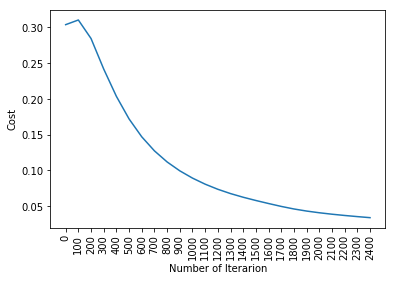

train accuracy: 99.42528735632185 %
test accuracy: 95.16129032258064 %


In [26]:
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)